In [127]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pickle
import random
import keras
import cv2

In [128]:
#1a Utility function to read Cifar-10 image file  
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

In [129]:
#1b Read the dataset layout description. Organize the data in your own format if needed.
# Data Description
root = 'cifar-10-data\cifar-10-batches-py'
meta_description_file = os.path.join(root,'batches.meta')
meta_data = unpickle(meta_description_file)
df = pd.DataFrame(meta_data)
df

,num_cases_per_batch,label_names,num_vis
0,10000,airplane,3072
1,10000,automobile,3072
2,10000,bird,3072
3,10000,cat,3072
4,10000,deer,3072
5,10000,dog,3072
6,10000,frog,3072
7,10000,horse,3072
8,10000,ship,3072
9,10000,truck,3072


Text(0.5, 0.98, 'Random 100 Images from Cifar-10 Dataset')

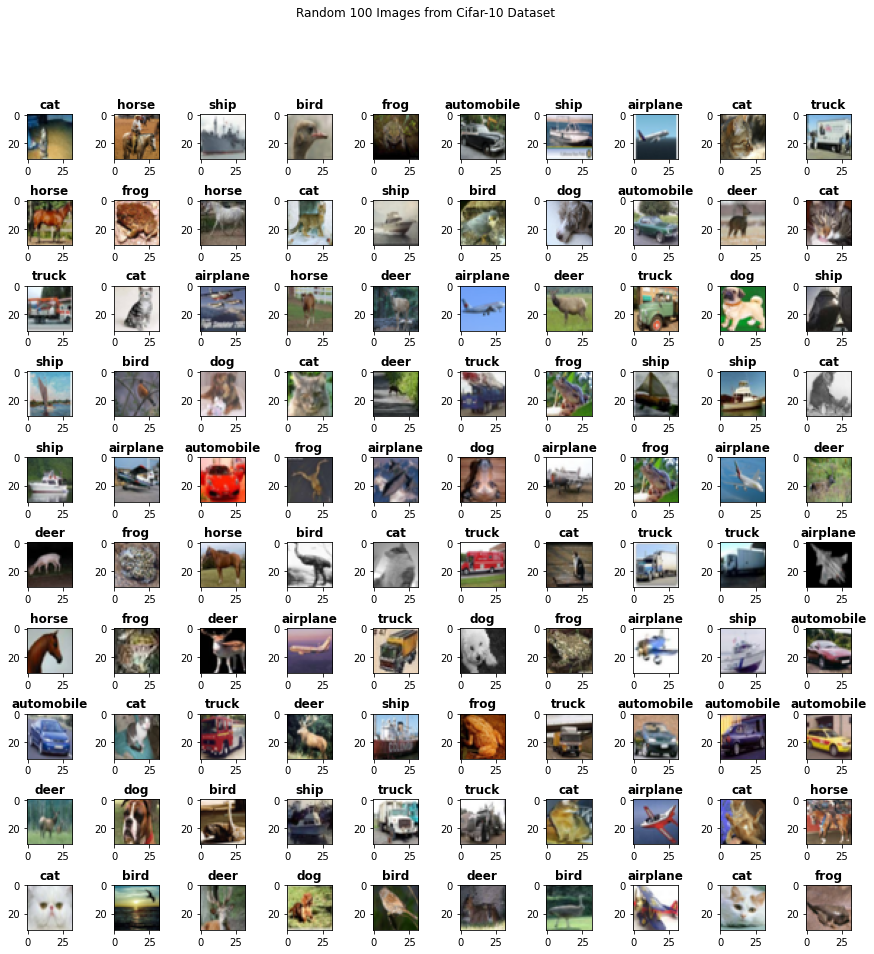

In [133]:
# 1c. Verify image and label reading
#    • Randomly select 100 images and visualize them in 10x10 grids.
#    • Display the class name or label on top of each image.

rows = 10
columns = 10
count = 0

fig, axes = plt.subplots(nrows = rows, ncols = columns, figsize=(15,15))

for row_image_index in range(rows):
    for column_image_index in range(rows):
        index = random.randint(0,10001)
        label_value = training_set_labels[index]
        label_name =  meta_data['label_names'][label_value]
        axes[row_image_index,column_image_index].imshow(training_set_data[index]) 
        axes[row_image_index,column_image_index].set_title(label_name, fontweight ="bold")
plt.subplots_adjust(wspace=.5, hspace=.9)

fig.suptitle('Random 100 Images from Cifar-10 Dataset')


In [138]:
# 1d. Prepare images for training, validation and testing
# Reading the training set of 50,000 images
training_set_labels  = []
training_set_data  = []

root = 'cifar-10-data\cifar-10-batches-py'
for file in os.listdir(root)[1:6]:
    
    batch_file = unpickle(os.path.join(root,file))
    
    batch_label = batch_file['labels']
    batch_data = batch_file['data']
    for dt in batch_data:
        training_set_data.append(dt)
        
    training_set_labels += batch_label
        
training_set_data = np.array( training_set_data)

training_set_data = training_set_data.reshape(len(training_set_data),3,32,32).transpose(0,2,3,1).astype("uint32")
print(training_set_data.shape)

(50000, 32, 32, 3)


In [139]:
# Reading the test set of 10,000 images
test_set_labels  = []
test_set_data  = []


for file in os.listdir(root)[7:8]:
    file_data = unpickle(os.path.join(root,file))
    test_name = file_data['filenames']
    test_label = file_data['labels']
    test_image = file_data['data']
    
    for dt in test_image:
        test_set_data.append(dt)
    test_set_labels += test_label
        
test_set_data = np.array(test_set_data)

test_set_data = test_set_data.reshape(len(test_set_data),3,32,32).transpose(0,2,3,1).astype("uint32")
print(test_set_data.shape)

(10000, 32, 32, 3)


In [140]:
X_train = np.array([cv2.cvtColor(np.float32(image), cv2.COLOR_BGR2GRAY) for image in training_set_data])
X_test = np.array([cv2.cvtColor(np.float32(image), cv2.COLOR_BGR2GRAY) for image in test_set_data])

Text(0.5, 0.98, 'Random 100 Images from Cifar-10 Dataset')

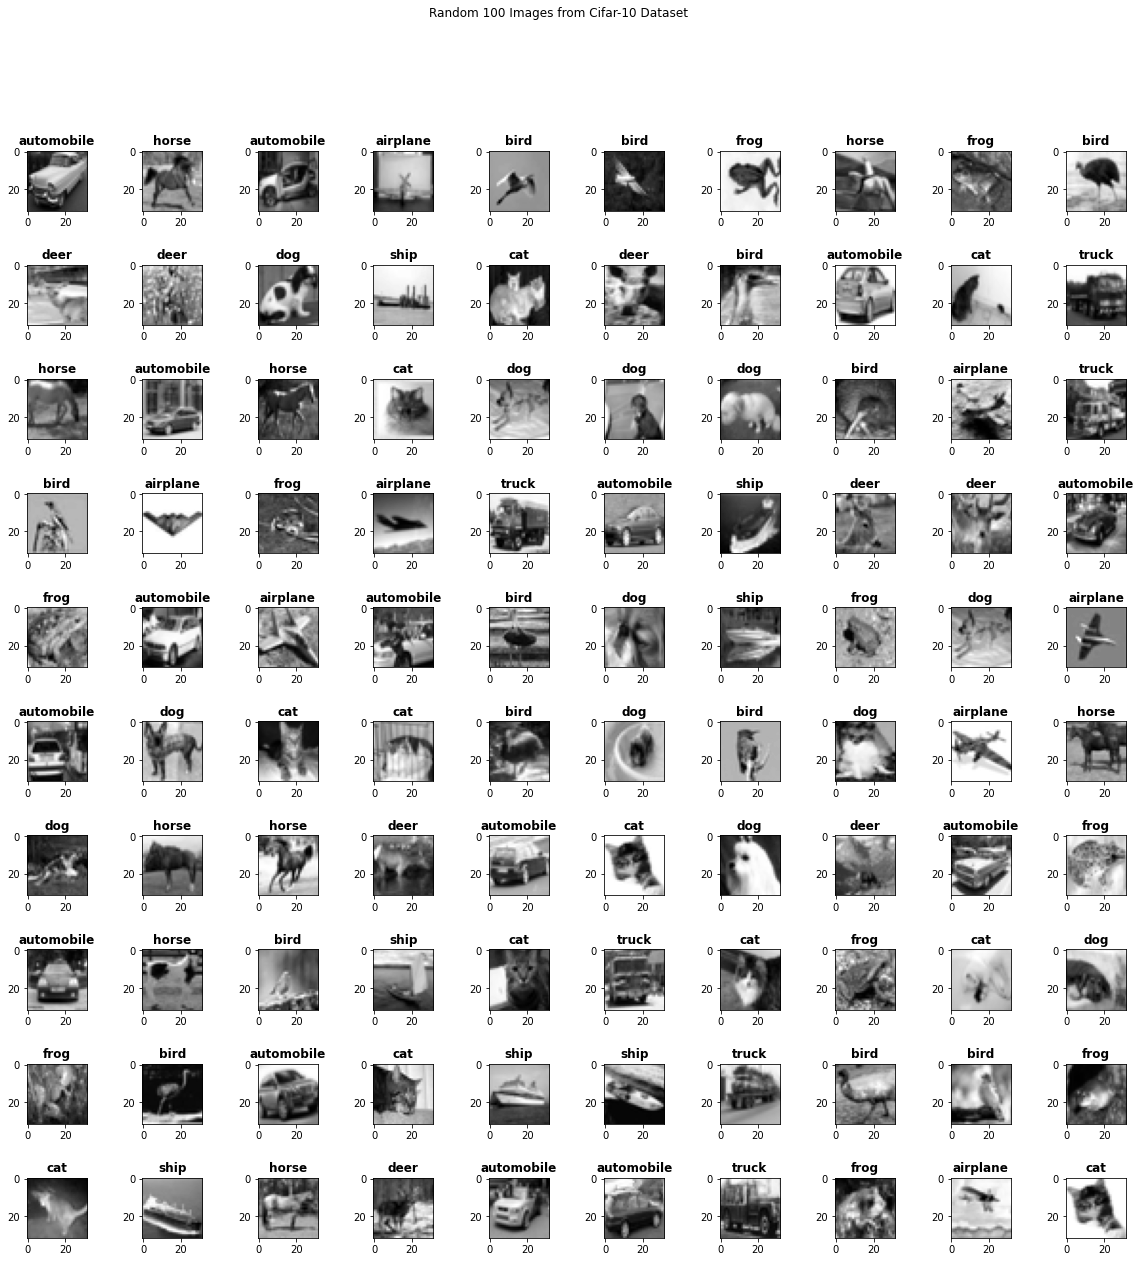

In [141]:
# 1e. Prepare corresponding image labels (target classes) for loss calculation and performance evaluation.
# Grid Image Display and class name on top of each image
rows = 10
columns = 10
count = 0

fig, axes = plt.subplots(nrows = rows, ncols = columns, figsize=(20,20))

for row_image_index in range(rows):
    for column_image_index in range(rows):
        index = random.randint(0,10001)
        label_value = training_set_labels[index]
        label_name =  meta_data['label_names'][label_value]
        axes[row_image_index,column_image_index].imshow(X_train[index],cmap='gray') 
        axes[row_image_index,column_image_index].set_title(label_name, fontweight ="bold")
plt.subplots_adjust(wspace=.5, hspace=.9)

fig.suptitle('Random 100 Images from Cifar-10 Dataset')

In [142]:
training_set_data = X_train/(float(255))
test_set_data = X_test/float(255)

In [143]:
from keras.utils import np_utils
train_categorical_label  = np_utils.to_categorical(training_set_labels)
test_categorical_label = np_utils.to_categorical(test_set_labels)

In [144]:
print(train_categorical_label[0:10])
print()
print (test_categorical_label[0:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [149]:
# Model
# 2. Creating Fully Connected layers Neural Network structure and using Adam Optimizer:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, Dropout
from keras.callbacks import ModelCheckpoint
from keras.optimizers  import Adam


In [150]:
# 3. Defining loss as Categorical cross entropy
# 4. Choosing Adam as Optimizer
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = (32,32,1), activation = "relu"))
model.add(MaxPooling2D(3,3))
model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, decay=0.0)

model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 64)        640       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 6400)              0         
                                                                 
 dense_57 (Dense)            (None, 1024)              6554624   
                                                                 
 dropout_13 (Dropout)        (None, 1024)              0         
                                                                 
 dense_58 (Dense)            (None, 512)               524800    
                                                     

In [151]:
# 5. Training the network
epochs = 100
batch_size = 32
model.fit(training_set_data,train_categorical_label, epochs = epochs,verbose = 1, batch_size = batch_size,validation_split = 0.2)

Epoch 1/100
1250/1250 [==============================] - 53s 42ms/step - loss: 1.5695 - accuracy: 0.4345 - val_loss: 1.2716 - val_accuracy: 0.5516
Epoch 2/100
1250/1250 [==============================] - 54s 43ms/step - loss: 1.2291 - accuracy: 0.5688 - val_loss: 1.2087 - val_accuracy: 0.5757
Epoch 3/100
1250/1250 [==============================] - 53s 42ms/step - loss: 1.0770 - accuracy: 0.6236 - val_loss: 1.0899 - val_accuracy: 0.6150
Epoch 4/100
1250/1250 [==============================] - 55s 44ms/step - loss: 0.9471 - accuracy: 0.6688 - val_loss: 1.1063 - val_accuracy: 0.6162
Epoch 5/100
1250/1250 [==============================] - 52s 42ms/step - loss: 0.8198 - accuracy: 0.7122 - val_loss: 1.0516 - val_accuracy: 0.6444
Epoch 6/100
1250/1250 [==============================] - 51s 41ms/step - loss: 0.7170 - accuracy: 0.7473 - val_loss: 1.0787 - val_accuracy: 0.6431
Epoch 7/100
1250/1250 [==============================] - 52s 42ms/step - loss: 0.6205 - accuracy: 0.7820 - val_loss: 1

1250/1250 [==============================] - 51s 40ms/step - loss: 0.0767 - accuracy: 0.9766 - val_loss: 2.2147 - val_accuracy: 0.6349
Epoch 57/100
1250/1250 [==============================] - 51s 41ms/step - loss: 0.0692 - accuracy: 0.9784 - val_loss: 2.3005 - val_accuracy: 0.6417
Epoch 58/100
1250/1250 [==============================] - 50s 40ms/step - loss: 0.0673 - accuracy: 0.9788 - val_loss: 2.4955 - val_accuracy: 0.6364
Epoch 59/100
1250/1250 [==============================] - 50s 40ms/step - loss: 0.0725 - accuracy: 0.9782 - val_loss: 2.3309 - val_accuracy: 0.6343
Epoch 60/100
1250/1250 [==============================] - 51s 40ms/step - loss: 0.0746 - accuracy: 0.9769 - val_loss: 2.2635 - val_accuracy: 0.6364
Epoch 61/100
1250/1250 [==============================] - 51s 40ms/step - loss: 0.0698 - accuracy: 0.9783 - val_loss: 2.3634 - val_accuracy: 0.6360
Epoch 62/100
1250/1250 [==============================] - 50s 40ms/step - loss: 0.0670 - accuracy: 0.9787 - val_loss: 2.4100 

In [152]:
# 6. Evaluating the performance with test dataset.
# Testing the model on the test_set_data
def testing(x):
    predicted_value = model.predict(x,verbose=0)
    return predicted_value
    
    


In [153]:
number_of_correct_pred = 0
number_of_wrong_pred = 0
df = pd.DataFrame({"Predicted Class":[],"Actual Class":[]})
number_of_test = 10000
for x,y in zip(test_set_data[0:number_of_test],test_categorical_label[0:number_of_test]):
    a = testing(x.reshape(1,32,32,1))
    max_value = np.amax(a)
    predicted_class = np.argmax(a)
    true_class = np.argmax(y)
    
    if predicted_class == true_class:
        number_of_correct_pred +=1
    else:
        number_of_wrong_pred +=1 
        
    df.loc[len(df.index)] = [predicted_class , true_class] 
        
    
    
#print(f"True Class: {true_class}   Predicted_class : {predicted_class}")
print(f"Number of Correct Predictions :{number_of_correct_pred}")
print(f"Number of Wrong Predictions :{number_of_wrong_pred}")

accuracy =round( number_of_correct_pred/ (number_of_correct_pred +number_of_wrong_pred ) *100,3)
print(f"The Accuracy of the model on the test is {accuracy}%")

df

Number of Correct Predictions :6259
Number of Wrong Predictions :3741
The Accuracy of the model on the test is 62.59%


,Predicted Class,Actual Class
0,3,3
1,8,8
2,3,8
3,0,0
4,3,6
...,...,...
9995,3,8
9996,6,3
9997,5,5
9998,1,1


In [155]:
# Using the model to test raw images
def rawImage(file_path):
    image_data = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    image_data = cv2.resize(image_data,(32,32))
    image_data = image_data/float(255)
    image_data = image_data.reshape(1,32,32,1)
    print(image_data.shape)
    pred_vec = testing(image_data)
    print(pred_vec)
    class_label = np.argmax(pred_vec)
    
    print(f"The Image is {meta_data['label_names'][class_label]}")
    
    
    

In [180]:
rawImage(r"C:\Users\nubil\Desktop\asasian.jpg")

(1, 32, 32, 1)
[[4.0802885e-08 2.7378627e-07 7.7077642e-04 1.6385894e-07 8.1595626e-06
  9.8244804e-01 1.6726617e-02 4.6025070e-05 1.1043150e-09 3.1695961e-08]]
The Image is dog
